In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-1-90417624ad18>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # iris setosa?


# Use Keras API

In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [ ]:
# build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
# equivalent way by passing all layers during creation
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation='relu'), 
keras.layers.Dense(100, activation='relu'), 
keras.layers.Dense(10, activation='softmax')])
#keras.utils.plot_model(model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) #sparse categorical because we have sparse labels (only the index of the class, rather than a one-hot encoding)

## training and evaluating the model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 26s 14ms/step - loss: 0.7151 - accuracy: 0.7662 - val_loss: 0.5096 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4864 - accuracy: 0.8307 - val_loss: 0.4342 - val_accuracy: 0.8556
Epoch 3/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4431 - accuracy: 0.8461 - val_loss: 0.4212 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4169 - accuracy: 0.8536 - val_loss: 0.4062 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3953 - accuracy: 0.8607 - val_loss: 0.4147 - val_accuracy: 0.8544
Epoch 6/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3794 - accuracy: 0.8673 - val_loss: 0.4018 - val_accuracy: 0.8524
Epoch 7/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3653 - accuracy: 0.8706 - val_loss: 0.4102 -

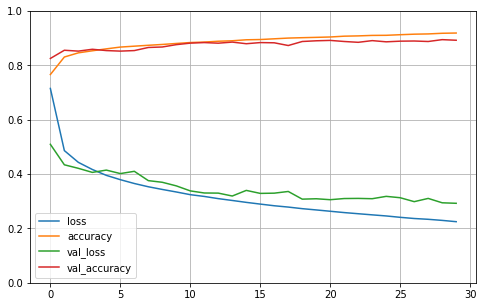

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3238 - accuracy: 0.8824


[0.3238089084625244, 0.8823999762535095]

In [13]:
# try out some predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
y_pred = np.argmax(y_proba, axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 1.6793 - val_loss: 0.5824
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4814 - val_loss: 0.4510
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4505 - val_loss: 0.4910
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6193 - val_loss: 0.4692
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4426 - val_loss: 0.4386
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4244 - val_loss: 0.4216
Epoch 7/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4084 - val_loss: 0.4091
Epoch 8/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4024 - val_loss: 0.4045
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3950 - val_loss: 0.4017
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3931 - val_loss: 0.3979

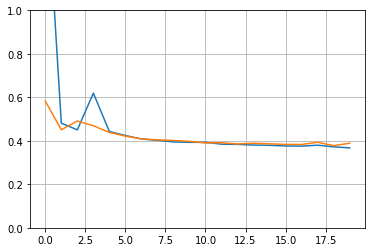

In [19]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()